In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [2]:
training_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [12]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [19]:
len(training_data[0])

2

In [23]:
type(training_data[0])

tuple

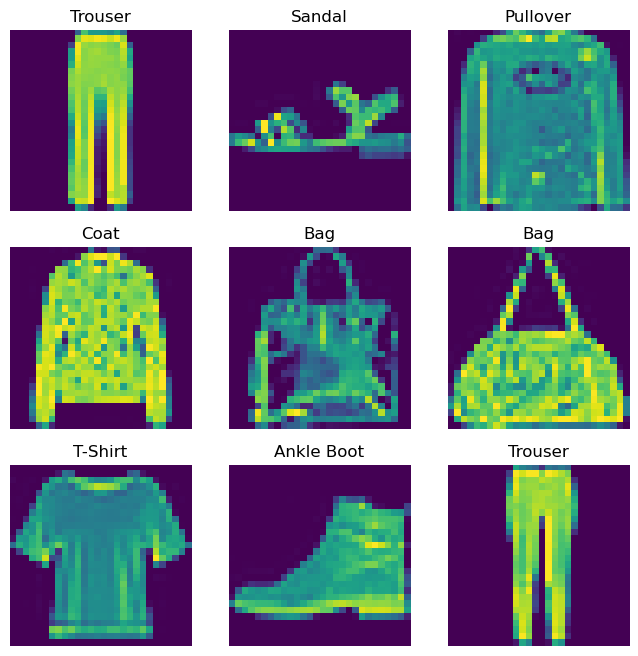

In [21]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())

In [22]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [25]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


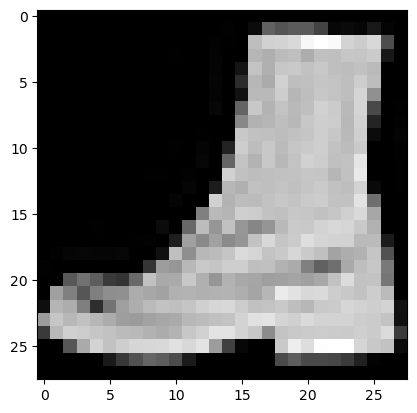

Label: 9


In [27]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [29]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="./data",
    train= True,
    download=False,
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0,index=torch.tensor(y), value=1))
)

In [31]:
ds[0][1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [46]:
for i in torch.randint(0,10,(10,1)):
    print(i)
    one_hot_torch = torch.zeros(10).scatter_(0,index=i,value=1)
    print(one_hot_torch)

tensor([9])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
tensor([6])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([3])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([5])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
tensor([0])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


In [47]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [54]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [55]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[ 0.0374,  0.0261, -0.0080, -0.0817, -0.0307,  0.0636, -0.1410, -0.0216,
          0.0083,  0.0040]], grad_fn=<AddmmBackward0>)
tensor([[0.1051, 0.1040, 0.1005, 0.0933, 0.0982, 0.1079, 0.0880, 0.0991, 0.1021,
         0.1017]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([5])


在 PyTorch 中，`nn.Flatten()` 是一个**神经网络层**，用于将输入张量展平成一维（扁平化）。它通常用于在**卷积层（CNN）和全连接层（Dense）**之间进行转换。

---

### **1. 为什么需要 Flatten？**
在卷积神经网络（CNN）中，卷积层输出的特征通常是**多维张量**（如批次大小 × 通道数 × 高度 × 宽度）。  
而全连接层（线性层）需要一维输入（批次大小 × 特征数）。  
**Flatten** 就是用于**将多维张量展平成一维**，以便可以输入到全连接层中。

---

### **2. 语法和基本用法**
```python
import torch
from torch import nn

# 创建 Flatten 层
flatten = nn.Flatten()

# 创建一个 4D 张量 (batch_size, channels, height, width)
x = torch.randn(2, 3, 4, 4)  # 形状：[2, 3, 4, 4]
print("输入形状:", x.shape)

# 执行 Flatten 操作
flattened_x = flatten(x)
print("展平后的形状:", flattened_x.shape)
```

#### **输出：**
```
输入形状: torch.Size([2, 3, 4, 4])
展平后的形状: torch.Size([2, 48])
```
解释：
- 输入张量形状为 `[2, 3, 4, 4]`：表示批次大小为 2，通道数为 3，宽高为 4×4。
- Flatten 后的形状为 `[2, 48]`：批次大小仍为 2，特征数为 `3 × 4 × 4 = 48`。

---

### **3. 自定义 Flatten 范围**
**`nn.Flatten(start_dim=1, end_dim=-1)`**

#### **默认参数：**
- `start_dim=1`：从第 1 维开始展平（保留批次维度）。
- `end_dim=-1`：展平到最后一维。

#### **示例：**
```python
flatten = nn.Flatten(start_dim=1, end_dim=-1)
x = torch.randn(2, 3, 4, 4)
flattened_x = flatten(x)
print("自定义展平后的形状:", flattened_x.shape)
```
**输出：**
```
自定义展平后的形状: torch.Size([2, 48])
```

#### **展平特定维度：**
```python
flatten = nn.Flatten(start_dim=2, end_dim=3)  # 仅展平最后两个维度
x = torch.randn(2, 3, 4, 4)
flattened_x = flatten(x)
print("部分展平后的形状:", flattened_x.shape)
```
**输出：**
```
部分展平后的形状: torch.Size([2, 3, 16])
```
解释：  
- 仅将最后两个维度 `[4, 4]` 展平成 `[16]`。

---

### **4. 在模型中使用 Flatten**
通常在 CNN 中，Flatten 位于卷积层和全连接层之间。

#### **示例：CNN 网络**
```python
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),  # 输出形状：[batch, 32, 26, 26]
            nn.ReLU(),
            nn.MaxPool2d(2),                 # 输出形状：[batch, 32, 13, 13]
            nn.Flatten(),                    # 输出形状：[batch, 5408]
            nn.Linear(32 * 13 * 13, 128),
            nn.ReLU(),
            nn.Linear(128, 10)               # 输出形状：[batch, 10]
        )

    def forward(self, x):
        return self.network(x)

model = SimpleCNN()
x = torch.randn(5, 1, 28, 28)  # 批次大小为 5，输入图像为 28x28
output = model(x)
print("输出形状:", output.shape)
```
**输出：**
```
输出形状: torch.Size([5, 10])
```

---

### **5. 手动展平 vs `nn.Flatten()`**
手动展平可以通过 `x.view()` 或 `x.reshape()` 来实现：
```python
x = torch.randn(2, 3, 4, 4)
flattened_x = x.view(x.size(0), -1)  # 或 x.reshape(x.size(0), -1)
print(flattened_x.shape)  # torch.Size([2, 48])
```
**优点：**
- 更灵活，适用于一些动态维度。
- 更加显式，便于理解。

**缺点：**
- 代码略显冗长，不如 `nn.Flatten()` 简洁。

---

### **6. Flatten 和展平操作的区别**
| 方法            | 作用范围 | 是否自动保留批次维度 | 是否推荐 |
|----------------|---------|---------------------|---------|
| `nn.Flatten()`  | 任意维度 | 是                   | ✅       |
| `x.view()`      | 固定形状 | 否                   | ⚠️       |
| `x.reshape()`   | 灵活形状 | 否                   | ⚠️       |

---

### **7. 何时使用 Flatten：**
- **CNN 网络中：** 卷积层和全连接层之间使用，转换张量形状。
- **特征提取：** 提取图像特征后，需要作为输入传递给分类器。
- **批量处理：** 将批次维度保留，展平其余维度，方便批处理操作。

---

### **8. 总结：**
- `nn.Flatten()` 是一个非常便捷的层，主要用于**将多维张量展平成一维**。
- 常用于 CNN 卷积层和全连接层之间的转换。
- 通过 `start_dim` 和 `end_dim` 可以灵活控制展平范围。

如果还有疑问或需要更多示例，随时联系我！😊

在 PyTorch 中，`nn.Softmax` 是一个**激活函数层**，用于将输入的向量转换为**概率分布**，使得每个元素在 (0, 1) 之间，并且所有元素之和等于 1。

---

### **1. 为什么使用 Softmax？**

Softmax 常用于**多分类问题的输出层**，例如：
- 图像分类（每个类别的概率）
- 自然语言处理（词汇表中词语的概率）

#### **公式：**
假设输入向量为 \([z_1, z_2, ..., z_n]\)，Softmax 计算如下：
\[
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
\]

---

### **2. 语法及参数：**
```python
import torch
import torch.nn as nn

softmax = nn.Softmax(dim=1)  # 指定沿哪个维度进行计算
```

#### **参数：**
- `dim`：沿哪个维度进行 Softmax 运算。
  - **通常为 1**（表示在每个样本的特征维度上计算）。

---

### **3. 基本用法：**
#### **示例：2D 张量 (批次 × 类别数)**
```python
x = torch.tensor([[1.0, 2.0, 3.0],
                 [0.5, 0.2, 0.3]])

# 沿第1维计算，即每一行进行softmax
softmax = nn.Softmax(dim=1)
output = softmax(x)
print("Softmax输出：\n", output)
print("和为1：\n", output.sum(dim=1))
```

#### **输出：**
```
Softmax输出：
 tensor([[0.0900, 0.2447, 0.6652],
         [0.3894, 0.2852, 0.3254]])
和为1：
 tensor([1.0000, 1.0000])
```

---

### **4. 不同维度上的 Softmax**
假设输入为三维张量 `(batch, channels, features)`：
```python
x = torch.randn(2, 3, 4)  # batch_size=2, channels=3, features=4
softmax_dim0 = nn.Softmax(dim=0)  # 沿批次维度计算
softmax_dim1 = nn.Softmax(dim=1)  # 沿通道维度计算
softmax_dim2 = nn.Softmax(dim=2)  # 沿特征维度计算

print("沿批次维度计算：\n", softmax_dim0(x))
print("沿通道维度计算：\n", softmax_dim1(x))
print("沿特征维度计算：\n", softmax_dim2(x))
```

---

### **5. Softmax 在模型中的应用**

#### **示例：多分类网络**
```python
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer = nn.Linear(10, 3)  # 输入 10 维，输出 3 类
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.layer(x)
        x = self.softmax(x)
        return x

model = SimpleNN()
input_data = torch.randn(5, 10)  # 批次为5，特征为10
output = model(input_data)
print("网络输出：\n", output)
print("每行和：", output.sum(dim=1))
```

---

### **6. Softmax 与 CrossEntropyLoss**
在 PyTorch 中，**不要手动添加 Softmax 和 CrossEntropyLoss** 一起使用。  
`nn.CrossEntropyLoss` 自动应用了 `LogSoftmax`，直接传入**原始 logits** 即可。

#### **错误示范：**
```python
# 错误：重复使用 Softmax
model = SimpleNN()
criterion = nn.CrossEntropyLoss()

# 网络输出已经是 Softmax 之后的概率
output = model(input_data)
target = torch.randint(0, 3, (5,))

# 由于 output 已经是概率分布，这里会导致梯度不稳定
loss = criterion(output, target)
```

#### **正确示范：**
```python
# 正确：网络只输出 logits，交叉熵自动计算 Softmax
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer = nn.Linear(10, 3)

    def forward(self, x):
        return self.layer(x)  # 不使用 Softmax

model = SimpleNN()
criterion = nn.CrossEntropyLoss()

# 直接输出 logits
output = model(input_data)
target = torch.randint(0, 3, (5,))
loss = criterion(output, target)
print("损失值：", loss.item())
```

---

### **7. 手动计算 Softmax**
如果不想使用 `nn.Softmax()`，可以手动计算：
```python
def softmax(x):
    exp_x = torch.exp(x)
    return exp_x / exp_x.sum(dim=1, keepdim=True)

x = torch.tensor([[1.0, 2.0, 3.0]])
print("手动计算的Softmax：\n", softmax(x))
```

---

### **8. 常见问题及注意事项**

#### **(1) Softmax 数值稳定性问题**
Softmax 计算中可能出现**数值溢出**：
\[
e^{x} \text{ 可能非常大，导致溢出}
\]
**改进：减去最大值：**
\[
\text{Softmax}(x) = \frac{e^{x_i - \max(x)}}{\sum e^{x_j - \max(x)}}
\]
PyTorch 中，`nn.Softmax()` 已自动进行数值稳定处理。

---

#### **(2) 当使用 `nn.CrossEntropyLoss` 时，避免手动 Softmax：**
- `nn.CrossEntropyLoss` 直接计算 logits。
- 手动 Softmax 会导致梯度消失或梯度爆炸。

---

### **9. Softmax 和 LogSoftmax 区别**
- `nn.Softmax`：输出为概率分布，数值范围在 (0, 1) 之间。
- `nn.LogSoftmax`：输出为对数概率，数值范围在 (-∞, 0) 之间。
- `nn.CrossEntropyLoss` 期望输入为 logits，所以**不要对 logits 进行 Softmax 或 LogSoftmax 处理**。

---

### **10. 总结**
1. `nn.Softmax` 将输入张量转换为概率分布，输出值在 (0, 1) 之间，且和为 1。
2. 多分类模型中通常在最后一层使用 Softmax。
3. 直接使用 `nn.CrossEntropyLoss` 时，不要手动使用 Softmax。
4. Softmax 的数值稳定性通过减去最大值来保证。

如果还有疑问或需要更多示例，随时联系我！😊

torch.Size([28, 28])


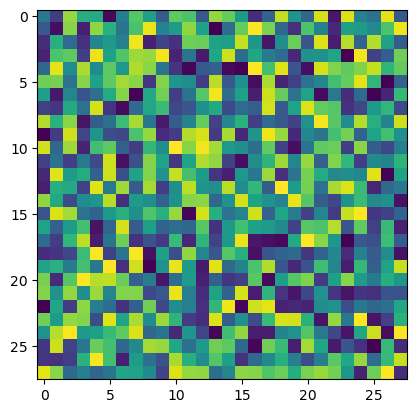

In [61]:
rand_img = torch.rand(1,28,28)
#去除单维度
rand_img = rand_img.squeeze()
print(rand_img.shape)
plt.imshow(rand_img)

In [62]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten() # flatten 默认从1开始铺平，保留批次维度
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [64]:
layer1 = nn.Linear(in_features=28*28, out_features=10)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 10])


In [65]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")


Before ReLU: tensor([[ 0.0981, -0.3411,  0.0645, -0.0076,  0.1311,  0.4123, -0.3241,  0.0674,
         -0.0545, -0.0537],
        [ 0.0248, -0.3795, -0.0127, -0.4883,  0.4911,  0.3530, -0.3411,  0.0800,
          0.2117, -0.2316],
        [ 0.1167,  0.1318,  0.2583, -0.5863,  0.3209,  0.5419, -0.1699,  0.2225,
         -0.0707, -0.1092]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0981, 0.0000, 0.0645, 0.0000, 0.1311, 0.4123, 0.0000, 0.0674, 0.0000,
         0.0000],
        [0.0248, 0.0000, 0.0000, 0.0000, 0.4911, 0.3530, 0.0000, 0.0800, 0.2117,
         0.0000],
        [0.1167, 0.1318, 0.2583, 0.0000, 0.3209, 0.5419, 0.0000, 0.2225, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)


In [67]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0155,  0.0201,  0.0274,  ..., -0.0105,  0.0119,  0.0093],
        [-0.0016,  0.0140,  0.0167,  ..., -0.0070,  0.0098,  0.0045]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0118, -0.0113], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0398, -0.0044,  0.0224,  ...,  0.0191, -0.0174, -0.0342],
        [-0.0274, -0.0040,  0.0200,  ..., -0.0017, -0.0358, -0.0080]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Siz